In [10]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

# Завдання 1

## Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

Крок 1: прочитаємо вміст файлів

In [2]:
df_2d = pd.read_csv("data/data_2d.csv")
df_2d.head()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


In [3]:
df_mnist = pd.read_csv("data/mnist.csv")
df_mnist.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Крок 2: За допомогою графіку визначимо "лікоть", який вкаже нам оптимальну кількість кластерів.

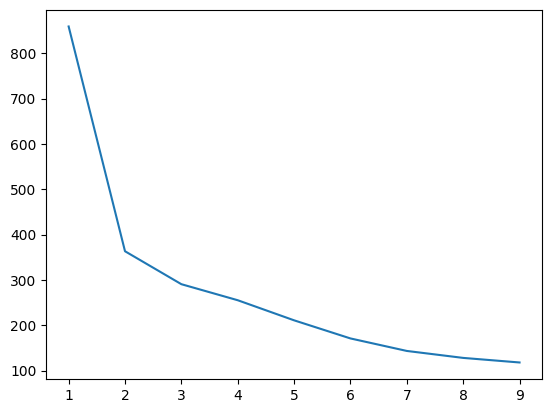

In [4]:
X = df_2d.values

inertia_values = []
for i in range(1, 10):
    kmeans = KMeans(
        n_clusters=i, init='random',
        n_init=1, max_iter=4, 
        tol=1e-04, random_state=2
    )
    y_km = kmeans.fit_predict(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia_values)

**Аналізуючи графік данних файлу data_2d.csv оптимальна кількість кластерів буде 2**

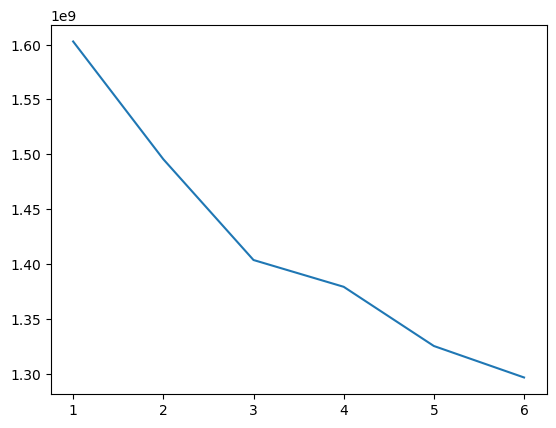

In [5]:
X = df_mnist.values

inertia_values = []
for i in range(1, 7):
    kmeans = KMeans(
        n_clusters=i, init='random',
        n_init=1, max_iter=4, 
        tol=1e-04, random_state=2
    )
    y_km = kmeans.fit_predict(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 7), inertia_values)

**Аналізуючи графік данних файлу mnist.csv оптимальна кількість кластерів буде 3**

# Завдання 2

## Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

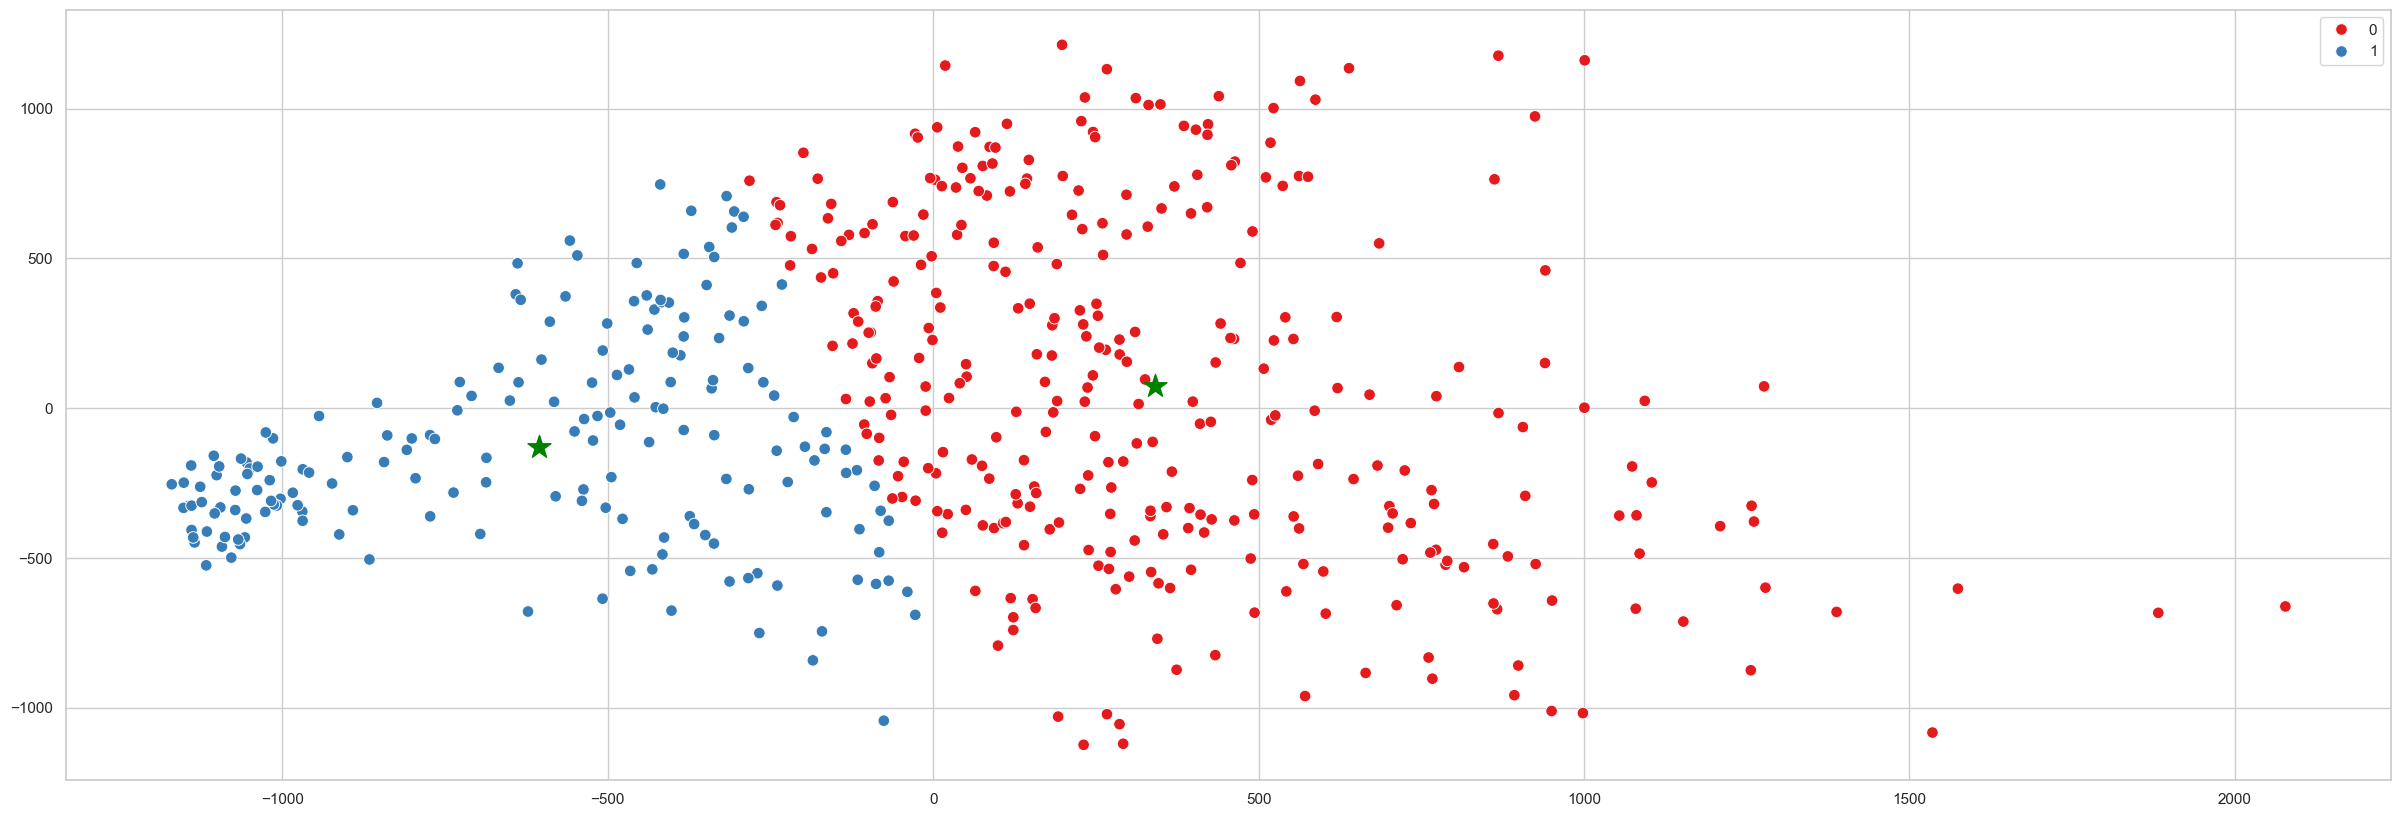

In [44]:
pca_2d = PCA(n_components=2).fit_transform(df_mnist)
kmeans_2d = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(pca_2d)

plt.figure(figsize=(30, 10))

sns.scatterplot(x=pca_2d[:,0], 
                y=pca_2d[:,1], 
                hue=kmeans_2d.labels_, 
                palette="Set1", 
                s=70)

plt.scatter(kmeans_2d.cluster_centers_[:, 0], 
            kmeans_2d.cluster_centers_[:, 1], 
            c='green', 
            marker='*', 
            s=300)

plt.show()

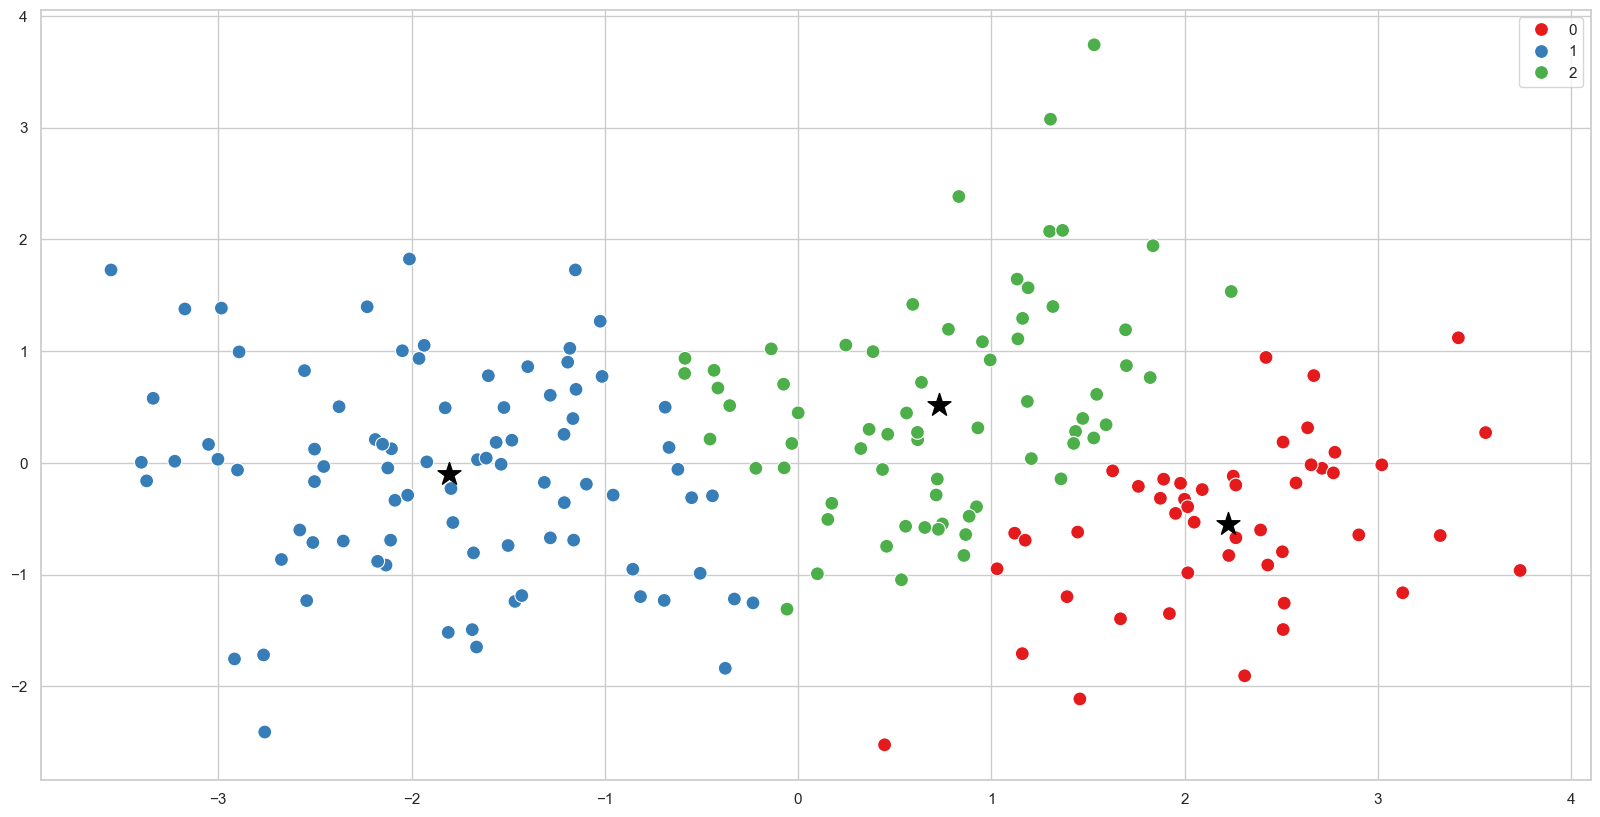

In [45]:
pca_data_mnist = PCA(n_components=3).fit_transform(df_2d)
kmeans_data_mnist = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(pca_data_mnist)

plt.figure(figsize=(20, 10))

sns.scatterplot(x=pca_data_mnist[:,0], 
                y=pca_data_mnist[:,1], 
                hue=kmeans_data_mnist.labels_, 
                palette="Set1", 
                s=100)

plt.scatter(kmeans_data_mnist.cluster_centers_[:, 0], 
            kmeans_data_mnist.cluster_centers_[:, 1], 
            c='black', 
            marker='*', 
            s=300)

plt.show()